In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('water_potability.csv')

In [4]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [8]:
df.isna().transpose()

,0,1,2,3,4,5,6,7,8,9,...,3266,3267,3268,3269,3270,3271,3272,3273,3274,3275
ph,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Hardness,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Solids,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Chloramines,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Sulfate,False,True,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,True,True,True
Conductivity,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Organic_carbon,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Trihalomethanes,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
Turbidity,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Potability,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<Axes: >

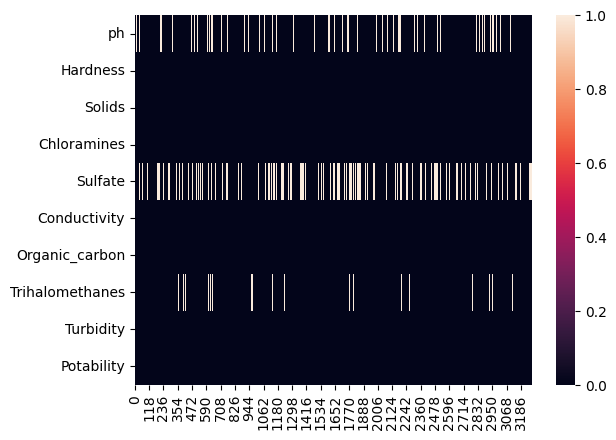

In [9]:
sns.heatmap(df.isna().transpose())

# Handling The Missing Value

In [10]:
# ph , sulfate and trihalomethanes have large number of missing value 
# we should deal with the missing value before creating a model

In [11]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [12]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [13]:
# for filling out the data me must check whether the data has outliers or not

<Axes: >

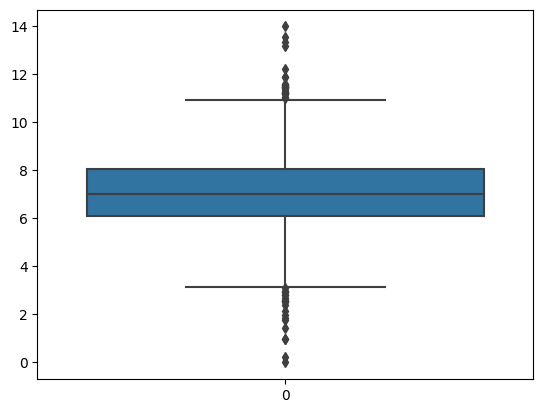

In [14]:
sns.boxplot(df.ph)

<Axes: >

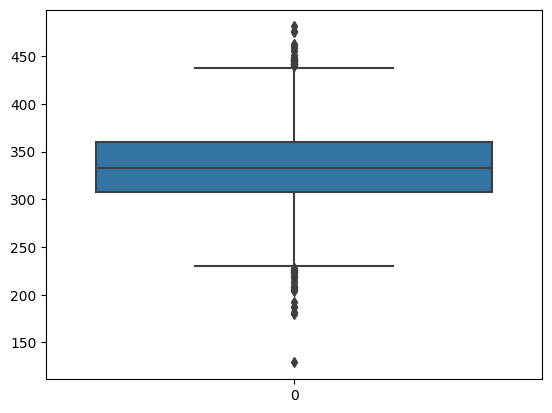

In [15]:
sns.boxplot(df.Sulfate)

<Axes: >

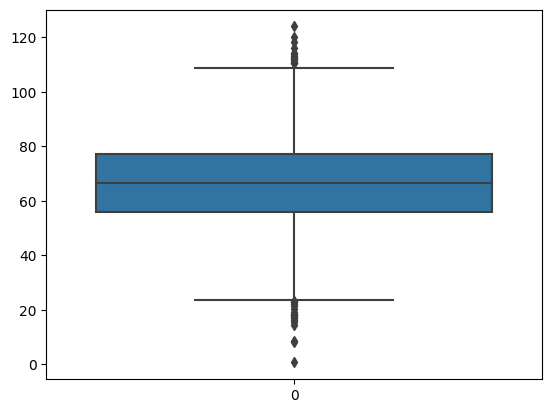

In [16]:
sns.boxplot(df.Trihalomethanes)

In [17]:
# median should be used to replace the null value as outliers are seen in the boxplot

In [19]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [23]:
df.fillna(value=df.median(),inplace=True)

In [24]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.073546,392.449580,19.903225,66.622485,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.073546,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.073546,402.883113,11.168946,77.488213,4.708658,1


In [25]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [26]:
#Null value have been replaced

# Lets Check The Corelation Between The Given Variables In The Data Set

<Axes: >

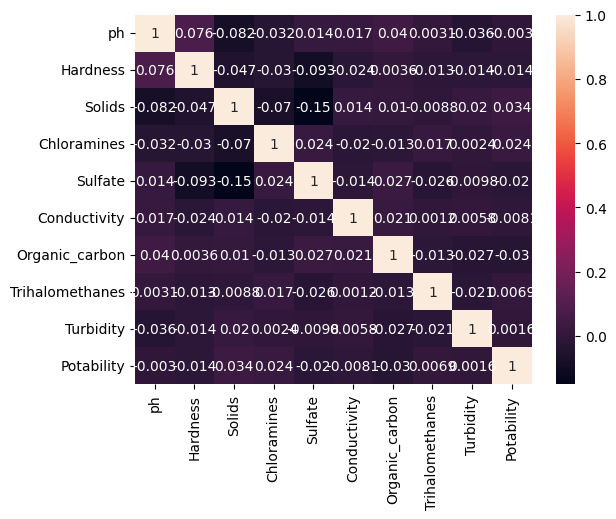

In [31]:
sns.heatmap(df.corr(),annot=True)


# Lets check the ouliers from the data

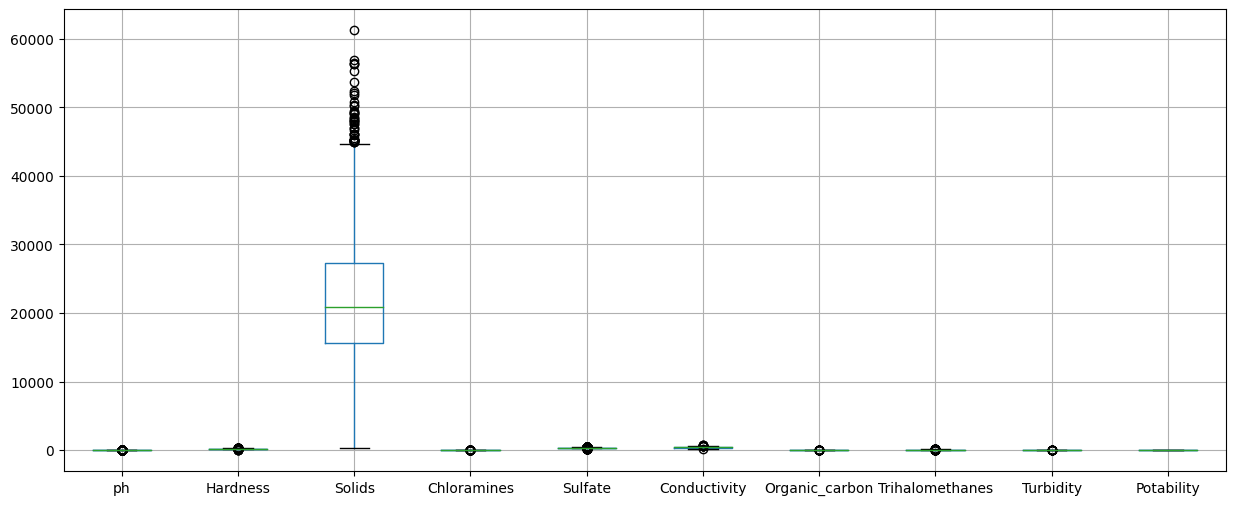

In [33]:
df.boxplot(figsize=(15,6))
plt.show()

In [34]:
# large numbers of outliers are seen in the solid column but removing it is not necessary 
# Because large no of solid outliers results in bad quality of water and removing it can affect our model prediction

# There is no need of Label Encoding

# Splitting the data for training

In [38]:
X=df.drop("Potability",axis="columns")
y=df.Potability

In [41]:
X.shape


(3276, 9)

In [42]:
y.shape

(3276,)

In [46]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=101)

In [51]:
X_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
748,6.750761,207.254505,23642.992597,7.691012,293.783040,446.696939,6.000391,30.900815,2.777726
2279,7.539742,201.959317,26716.359708,5.637350,333.073546,516.354560,14.985649,83.536821,4.210678
1960,8.128270,231.167537,19954.575554,5.138838,349.067363,386.071149,15.018085,63.340968,4.678742
1491,7.368166,204.041451,8524.874646,9.469763,429.814322,328.565288,11.173155,88.888819,3.684263
2991,6.628256,198.865743,15911.357509,7.517906,342.015924,437.918625,15.005742,38.845958,4.464457
...,...,...,...,...,...,...,...,...,...
599,7.036752,205.638790,39742.970329,4.660528,323.956492,509.546419,11.674850,55.042679,3.916746
1599,8.227083,274.351887,40546.956332,7.130161,241.446917,417.673702,9.809669,79.397105,3.619182
1361,4.906492,173.779159,14786.138901,5.843757,267.561144,620.346840,7.775896,38.794307,3.152345
1547,6.217585,203.707222,15597.640883,7.751461,361.247810,452.922025,14.597145,70.850977,4.150167


In [52]:
y_train

748     1
2279    0
1960    1
1491    1
2991    0
       ..
599     0
1599    1
1361    0
1547    1
863     0
Name: Potability, Length: 2620, dtype: int64

# Model Training

In [53]:
# Decision Tree Modeling

In [54]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [55]:
y_test

2541    0
2605    0
330     1
515     0
400     1
       ..
482     0
2970    0
50      0
839     0
374     1
Name: Potability, Length: 656, dtype: int64

In [63]:
y_pred=dt.predict(X_test)

In [64]:
y_pred[5]

0

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [67]:
accuracy_score(y_pred,y_test)

0.5762195121951219

In [83]:
# 58 % accuracy was obtained from decision tree algorithm

# Evaluation

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,precision_score,recall_score,f1_score

In [72]:
confusion_matrix(y_pred,y_test)

array([[267, 143],
       [135, 111]], dtype=int64)

In [73]:
recall=recall_score(y_true=y_test,y_pred=y_pred)
recall

0.43700787401574803

In [74]:
f1=f1_score(y_true=y_test,y_pred=y_pred)
f1

0.444

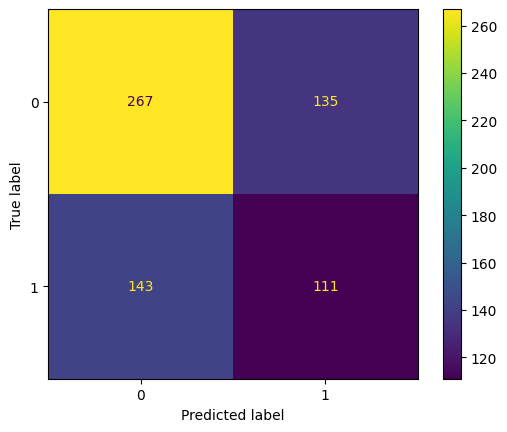

In [75]:
ConfusionMatrixDisplay.from_estimator(dt,X_test,y_test)

In [76]:
# logistic regression model

In [77]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=5000)

In [80]:
y_test

2541    0
2605    0
330     1
515     0
400     1
       ..
482     0
2970    0
50      0
839     0
374     1
Name: Potability, Length: 656, dtype: int64

In [81]:
Y_pred=model.predict(X_test)

In [82]:
accuracy_score(Y_pred,y_test)

0.614329268292683

In [84]:
# 61 % accuracy was obtained from decision logisticb regression

In [85]:
confusion_matrix(Y_pred,y_test)

array([[402, 253],
       [  0,   1]], dtype=int64)

In [4]:
#Finally for confusion matrix

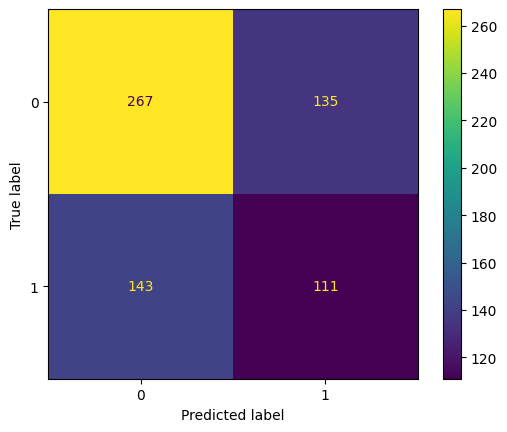

In [92]:
ConfusionMatrixDisplay.from_estimator(dt,X_test,y_test)